In [1]:
import os
import sys
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import variable_encode as var_encode
from sklearn.metrics import confusion_matrix,recall_score, auc, roc_curve,precision_score,accuracy_score,cohen_kappa_score,roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import matplotlib
matplotlib.rcParams['font.sans-serif']=['SimHei']   
matplotlib.rcParams['axes.unicode_minus']=False  
import warnings
warnings.filterwarnings("ignore") ##忽略警告

# 读取数据

In [2]:
data_train_1 = pd.read_excel('最终2018年改变分箱最后19个特征数据的分箱.xlsx')
data_test_1 = pd.read_excel('最终2019年-1改变分箱最后19个特征数据的分箱.xlsx')
data_test_2 = pd.read_excel('最终2019年-2改变分箱最后19个特征数据的分箱.xlsx')
data_test_3 = pd.read_excel('最终2019年-3改变分箱最后19个特征数据的分箱.xlsx')
data_test_4 = pd.read_excel('最终2019年-4改变分箱最后19个特征数据的分箱.xlsx')

In [3]:
data_train_1 = data_train_1.drop(columns = ['mths_since_recent_inq'])
data_test_1 = data_test_1.drop(columns = ['mths_since_recent_inq'])
data_test_2 = data_test_2.drop(columns = ['mths_since_recent_inq'])
data_test_3 = data_test_3.drop(columns = ['mths_since_recent_inq'])
data_test_4 = data_test_4.drop(columns = ['mths_since_recent_inq'])

In [4]:
    ####取出训练数据与测试数据
var_all = list(data_train_1.columns)
var_all.remove('loan_status')

# 变量归一化

In [5]:
####变量归一化
scaler = StandardScaler().fit(data_train_1[var_all])
data_train_1[var_all] = scaler.transform(data_train_1[var_all])  
data_test_1[var_all] = scaler.transform(data_test_1[var_all])
data_test_2[var_all] = scaler.transform(data_test_2[var_all])
data_test_3[var_all] = scaler.transform(data_test_3[var_all])
data_test_4[var_all] = scaler.transform(data_test_4[var_all])
    
x_train = np.array(data_train_1[var_all])
y_train = np.array(data_train_1.loan_status)
    
x_test_1 = np.array(data_test_1[var_all])
y_test_1 = np.array(data_test_1.loan_status)

x_test_2 = np.array(data_test_2[var_all])
y_test_2 = np.array(data_test_2.loan_status)

x_test_3 = np.array(data_test_3[var_all])
y_test_3 = np.array(data_test_3.loan_status)

x_test_4 = np.array(data_test_4[var_all])
y_test_4 = np.array(data_test_4.loan_status)  

# 模型训练

In [6]:
RF_model_2 = RandomForestClassifier(random_state=0, n_jobs=-1, criterion='entropy',
                                        n_estimators=100,
                                        max_depth=9,
                                        max_features=0.8,
                                        min_samples_split=50,
                                        class_weight={1: 3, 0: 1},
                                        bootstrap=True)

In [7]:
RF_model_2_fit = RF_model_2.fit(x_train, y_train)

In [8]:
    ##属性
ss = RF_model_2_fit.estimators_
RF_model_2_fit.classes_
RF_model_2_fit.n_features_
RF_model_2_fit.feature_importances_

array([0.25242626, 0.17571482, 0.08890543, 0.10521178, 0.04642203,
       0.0249665 , 0.02427927, 0.02088156, 0.02403278, 0.00971104,
       0.02254545, 0.02316895, 0.05149469, 0.02097398, 0.01967686,
       0.01931413, 0.04050634, 0.02976813])

## 模型预测

In [9]:
y_pred = RF_model_2_fit.predict(x_train)
y_proba = RF_model_2_fit.predict_proba(x_train)

In [10]:
y_pred_1 = RF_model_2_fit.predict(x_test_1)
y_proba_1 = RF_model_2_fit.predict_proba(x_test_1)
y_pred_2 = RF_model_2_fit.predict(x_test_2)
y_proba_2 = RF_model_2_fit.predict_proba(x_test_2)
y_pred_3 = RF_model_2_fit.predict(x_test_3)
y_proba_3 = RF_model_2_fit.predict_proba(x_test_3)
y_pred_4 = RF_model_2_fit.predict(x_test_4)
y_proba_4 = RF_model_2_fit.predict_proba(x_test_4)

# 模型评估

## 混淆矩阵

In [11]:
cnf_matrix = confusion_matrix(y_train,y_pred)
cnf_matrix = pd.DataFrame(cnf_matrix,index = ["标签为好","标签为坏"],columns = ['预测为好','预测为坏'])
cnf_matrix

预测为好   预测为坏
标签为好  125911  68792
标签为坏   21879  43567

In [12]:
cnf_matrix1 = confusion_matrix(y_test_1,y_pred_1)
cnf_matrix1 = pd.DataFrame(cnf_matrix1,index = ["标签为好","标签为坏"],columns = ['预测为好','预测为坏'])
cnf_matrix1

预测为好  预测为坏
标签为好  15854  8363
标签为坏   3570  5832

In [13]:
cnf_matrix2 = confusion_matrix(y_test_2,y_pred_2)
cnf_matrix2 = pd.DataFrame(cnf_matrix2,index = ["标签为好","标签为坏"],columns = ['预测为好','预测为坏'])
cnf_matrix2

预测为好  预测为坏
标签为好  15665  8460
标签为坏   3642  5828

In [14]:
cnf_matrix3 = confusion_matrix(y_test_3,y_pred_3)
cnf_matrix3 = pd.DataFrame(cnf_matrix3,index = ["标签为好","标签为坏"],columns = ['预测为好','预测为坏'])
cnf_matrix3

预测为好  预测为坏
标签为好  16057  8491
标签为坏   3538  5706

In [15]:
cnf_matrix4 = confusion_matrix(y_test_4,y_pred_4)
cnf_matrix4 = pd.DataFrame(cnf_matrix4,index = ["标签为好","标签为坏"],columns = ['预测为好','预测为坏'])
cnf_matrix4

预测为好  预测为坏
标签为好  15686  8472
标签为坏   3636  5747

## 评估指标

In [16]:
acc_suiji = accuracy_score(y_train,y_pred)
kappa_suiji = cohen_kappa_score(y_train,y_pred)
auc_suiji = roc_auc_score(y_train, y_proba[:,1])
fpr_suiji, tpr_suiji, thresholds_roc_suiji = roc_curve(y_train,y_proba[:,1])
ks_suiji = max([trp_ - fpr_ for trp_, fpr_ in zip(tpr_suiji, fpr_suiji)])
results = pd.DataFrame()
results['准确率'] = [acc_suiji]
results['AUC'] = [auc_suiji]
results['KS值'] = [ks_suiji]
results['kappa'] = [kappa_suiji]
results.index = ['随机森林']
results

准确率       AUC       KS值     kappa
随机森林  0.651465  0.718316  0.313242  0.252336

In [17]:
acc_suiji = accuracy_score(y_test_1,y_pred_1)
kappa_suiji = cohen_kappa_score(y_test_1,y_pred_1)
auc_suiji = roc_auc_score(y_test_1, y_proba_1[:,1])
fpr_suiji, tpr_suiji, thresholds_roc_suiji = roc_curve(y_test_1,y_proba_1[:,1])
ks_suiji = max([trp_ - fpr_ for trp_, fpr_ in zip(tpr_suiji, fpr_suiji)])
results1 = pd.DataFrame()
results1['准确率_1'] = [acc_suiji]
results1['AUC_1'] = [auc_suiji]
results1['KS值_1'] = [ks_suiji]
results1['kappa_1'] = [kappa_suiji]
results1.index = ['随机森林']
results1

准确率_1     AUC_1     KS值_1   kappa_1
随机森林  0.645052  0.692116  0.280774  0.237866

In [18]:
acc_suiji = accuracy_score(y_test_2,y_pred_2)
kappa_suiji = cohen_kappa_score(y_test_2,y_pred_2)
auc_suiji = roc_auc_score(y_test_2, y_proba_2[:,1])
fpr_suiji, tpr_suiji, thresholds_roc_suiji = roc_curve(y_test_2,y_proba_2[:,1])
ks_suiji = max([trp_ - fpr_ for trp_, fpr_ in zip(tpr_suiji, fpr_suiji)])
results2 = pd.DataFrame()
results2['准确率_2'] = [acc_suiji]
results2['AUC_2'] = [auc_suiji]
results2['KS值_2'] = [ks_suiji]
results2['kappa_2'] = [kappa_suiji]
results2.index = ['随机森林']
results2

准确率_2     AUC_2     KS值_2   kappa_2
随机森林  0.639768  0.682775  0.267304  0.229309

In [19]:
acc_suiji = accuracy_score(y_test_3,y_pred_3)
kappa_suiji = cohen_kappa_score(y_test_3,y_pred_3)
auc_suiji = roc_auc_score(y_test_3, y_proba_3[:,1])
fpr_suiji, tpr_suiji, thresholds_roc_suiji = roc_curve(y_test_3,y_proba_3[:,1])
ks_suiji = max([trp_ - fpr_ for trp_, fpr_ in zip(tpr_suiji, fpr_suiji)])
results3 = pd.DataFrame()
results3['准确率_3'] = [acc_suiji]
results3['AUC_3'] = [auc_suiji]
results3['KS值_3'] = [ks_suiji]
results3['kappa_3'] = [kappa_suiji]
results3.index = ['随机森林']
results3

准确率_3     AUC_3     KS值_3   kappa_3
随机森林  0.644028  0.685225  0.274002  0.232534

In [20]:
acc_suiji = accuracy_score(y_test_4,y_pred_4)
kappa_suiji = cohen_kappa_score(y_test_4,y_pred_4)
auc_suiji = roc_auc_score(y_test_4, y_proba_4[:,1])
fpr_suiji, tpr_suiji, thresholds_roc_suiji = roc_curve(y_test_4,y_proba_4[:,1])
ks_suiji = max([trp_ - fpr_ for trp_, fpr_ in zip(tpr_suiji, fpr_suiji)])
results4 = pd.DataFrame()
results4['准确率_4'] = [acc_suiji]
results4['AUC_4'] = [auc_suiji]
results4['KS值_4'] = [ks_suiji]
results4['kappa_4'] = [kappa_suiji]
results4.index = ['随机森林']
results4

准确率_4     AUC_4     KS值_4   kappa_4
随机森林  0.639009  0.683694  0.265706  0.226155

In [21]:
acc1=[results1['准确率_1'],results2['准确率_2'],results3['准确率_3'],results4['准确率_4']]
ac1=np.mean(acc1)
bc1=np.std(acc1)

In [22]:
acc2=[results1['AUC_1'],results2['AUC_2'],results3['AUC_3'],results4['AUC_4']]
ac2=np.mean(acc2)
bc2=np.std(acc2)

In [23]:
acc3=[results1['KS值_1'],results2['KS值_2'],results3['KS值_3'],results4['KS值_4']]
ac3=np.mean(acc3)
bc3=np.std(acc3)

In [24]:
acc4=[results1['kappa_1'],results2['kappa_2'],results3['kappa_3'],results4['kappa_4']]
ac4=np.mean(acc4)
bc4=np.std(acc4)

In [25]:
results11 =pd.DataFrame({'准确率的均值':{'随机森林':ac1},'准确率的方差':{'随机森林':bc1},
                   'AUC的均值':{'随机森林':ac2},'KS值的均值':{'随机森林':ac3},
                   'kappa的均值':{'随机森林':ac4}})
results11

准确率的均值    准确率的方差    AUC的均值    KS值的均值  kappa的均值
随机森林  0.641964  0.002615  0.685953  0.271947  0.231466

## ROC和KS曲线

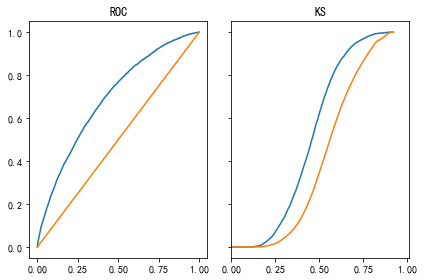

In [26]:
y_proba_suiji_1= y_proba_1
fig,(axe1,axe2) = plt.subplots(1,2,sharey = True)
for i in range(len(np.unique(y_test_1))):
    fpr,tpr,thresholds = roc_curve(y_test_1,y_proba_suiji_1[:,i],pos_label = i)
axe1.plot(fpr,tpr)
axe1.plot([0,1],[0,1])
axe1.set_title('ROC')
axe2.plot(1 - thresholds,tpr,label = 'TPR')
axe2.plot(1 - thresholds,fpr,label = 'FPR')
plt.xlim(0,)
axe2.set_title('KS')
plt.tight_layout()
plt.show()

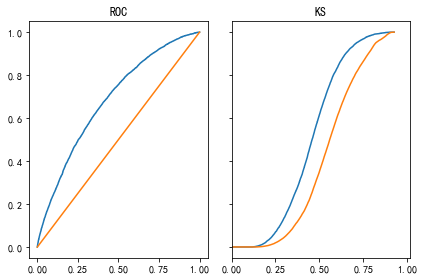

In [27]:
y_proba_suiji_2= y_proba_2
fig,(axe1,axe2) = plt.subplots(1,2,sharey = True)
for i in range(len(np.unique(y_test_2))):
    fpr,tpr,thresholds = roc_curve(y_test_2,y_proba_suiji_2[:,i],pos_label = i)
axe1.plot(fpr,tpr)
axe1.plot([0,1],[0,1])
axe1.set_title('ROC')
axe2.plot(1 - thresholds,tpr,label = 'TPR')
axe2.plot(1 - thresholds,fpr,label = 'FPR')
plt.xlim(0,)
axe2.set_title('KS')
plt.tight_layout()
plt.show()

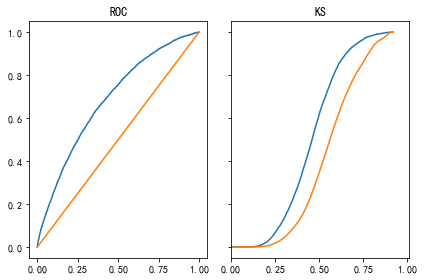

In [28]:
y_proba_suiji_3= y_proba_3
fig,(axe1,axe2) = plt.subplots(1,2,sharey = True)
for i in range(len(np.unique(y_test_3))):
    fpr,tpr,thresholds = roc_curve(y_test_3,y_proba_suiji_3[:,i],pos_label = i)
axe1.plot(fpr,tpr)
axe1.plot([0,1],[0,1])
axe1.set_title('ROC')
axe2.plot(1 - thresholds,tpr,label = 'TPR')
axe2.plot(1 - thresholds,fpr,label = 'FPR')
plt.xlim(0,)
axe2.set_title('KS')
plt.tight_layout()
plt.show()

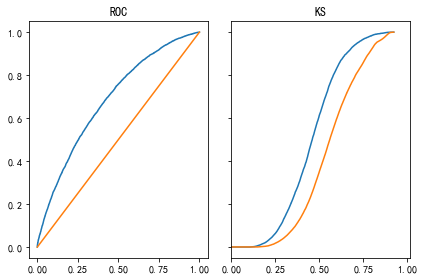

In [29]:
y_proba_suiji_4= y_proba_4
fig,(axe1,axe2) = plt.subplots(1,2,sharey = True)
for i in range(len(np.unique(y_test_4))):
    fpr,tpr,thresholds = roc_curve(y_test_4,y_proba_suiji_4[:,i],pos_label = i)
axe1.plot(fpr,tpr)
axe1.plot([0,1],[0,1])
axe1.set_title('ROC')
axe2.plot(1 - thresholds,tpr,label = 'TPR')
axe2.plot(1 - thresholds,fpr,label = 'FPR')
plt.xlim(0,)
axe2.set_title('KS')
plt.tight_layout()
plt.show()

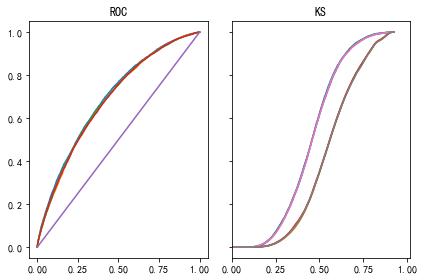

In [30]:
y_proba_suiji_1= y_proba_1
y_proba_suiji_2= y_proba_2
y_proba_suiji_3= y_proba_3
y_proba_suiji_4= y_proba_4
fig,(axe1,axe2) = plt.subplots(1,2,sharey = True)
for i in range(len(np.unique(y_test_1))):
    fpr_1,tpr_1,thresholds_1 = roc_curve(y_test_1,y_proba_suiji_1[:,i],pos_label = i)
for i in range(len(np.unique(y_test_2))):
    fpr_2,tpr_2,thresholds_2 = roc_curve(y_test_2,y_proba_suiji_2[:,i],pos_label = i)
for i in range(len(np.unique(y_test_3))):
    fpr_3,tpr_3,thresholds_3 = roc_curve(y_test_3,y_proba_suiji_3[:,i],pos_label = i)
for i in range(len(np.unique(y_test_4))):
    fpr_4,tpr_4,thresholds_4 = roc_curve(y_test_4,y_proba_suiji_4[:,i],pos_label = i)    
axe1.plot(fpr_1,tpr_1)
axe1.plot(fpr_2,tpr_2)
axe1.plot(fpr_3,tpr_3)
axe1.plot(fpr_4,tpr_4)
axe1.plot([0,1],[0,1])
axe1.set_title('ROC')
axe2.plot(1 - thresholds_1,tpr_1,label = 'TPR')
axe2.plot(1 - thresholds_1,fpr_1,label = 'FPR')
axe2.plot(1 - thresholds_2,tpr_2,label = 'TPR')
axe2.plot(1 - thresholds_2,fpr_2,label = 'FPR')
axe2.plot(1 - thresholds_3,tpr_3,label = 'TPR')
axe2.plot(1 - thresholds_3,fpr_3,label = 'FPR')
axe2.plot(1 - thresholds_4,tpr_4,label = 'TPR')
axe2.plot(1 - thresholds_4,fpr_4,label = 'FPR')
plt.xlim(0,)
axe2.set_title('KS')
plt.tight_layout()
plt.show()

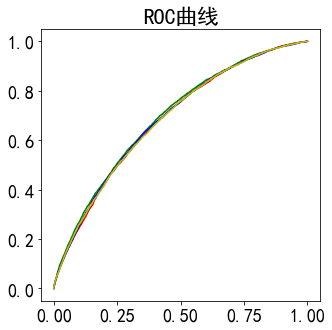

In [31]:
matplotlib.rcParams['font.sans-serif']=['SimHei']   
matplotlib.rcParams['axes.unicode_minus']=False  
font={'family':'SimHei',"size":18}
matplotlib.rc("font",**font)
fig=plt.figure(figsize=(5,5))
plt.title('ROC曲线')
plt.plot(fpr_1,tpr_1,color='g',label="ROC_1")
plt.plot(fpr_2,tpr_2,color='r',label="ROC_2")
plt.plot(fpr_3,tpr_3,color='b',label="ROC_3")
plt.plot(fpr_4,tpr_4,color='y',label="ROC_4")
plt.show()

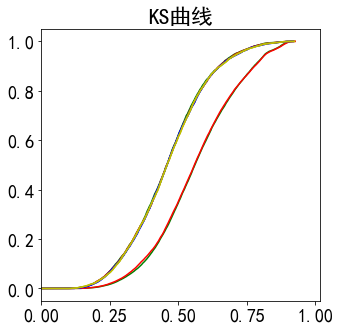

In [32]:
matplotlib.rcParams['font.sans-serif']=['SimHei']   
matplotlib.rcParams['axes.unicode_minus']=False  
font={'family':'SimHei',"size":18}
matplotlib.rc("font",**font)
fig=plt.figure(figsize=(5,5))
plt.title('KS曲线')
plt.plot(1 - thresholds_1,tpr_1,color='g',label='TPR')
plt.plot(1 - thresholds_1,fpr_1,color='g',label='FPR')
plt.plot(1 - thresholds_2,tpr_2,color='r',label='TPR')
plt.plot(1 - thresholds_2,fpr_2,color='r',label='FPR')
plt.plot(1 - thresholds_3,tpr_3,color='b',label='TPR')
plt.plot(1 - thresholds_3,tpr_3,color='b',label='FPR')
plt.plot(1 - thresholds_4,tpr_4,color='y',label='TPR')
plt.plot(1 - thresholds_4,tpr_4,color='y',label='FPR')
plt.xlim(0,)
plt.show()

##  k折交叉检验

In [33]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore") ##忽略警告

In [34]:
#ef muti_score(model):
warnings.filterwarnings('ignore')
accuracy = cross_val_score(RF_model_2, x_train, y_train, scoring='accuracy', cv=5)
acc_mean=accuracy.mean()
acc_std=accuracy.std()
results = pd.DataFrame()
results["准确率均值"] = [acc_mean]
results["准确率标准差"] = [acc_std]
results.index = ['随机森林']
results
#rint("准确率均值",accuracy.mean())
#rint("准确率方差",accuracy.var())

准确率均值    准确率标准差
随机森林  0.643919  0.004259

## 模型psi计算

In [35]:
def cal_psi(actual, predict, bins=10):
    actual_min = actual.min()  # 实际中的最小概率
    actual_max = actual.max()  # 实际中的最大概率
    binlen = (actual_max - actual_min) / bins
    cuts = [actual_min + i * binlen for i in range(1, bins)]#设定分组
    cuts.insert(0, -float("inf"))
    cuts.append(float("inf"))
    actual_cuts = np.histogram(actual, bins=cuts)#将actual等宽分箱
    predict_cuts = np.histogram(predict, bins=cuts)#将predict按actual的分组等宽分箱
    actual_df = pd.DataFrame(actual_cuts[0],columns=['actual'])
    predict_df = pd.DataFrame(predict_cuts[0], columns=['predict'])
    psi_df = pd.merge(actual_df,predict_df,right_index=True,left_index=True)
    psi_df['actual_rate'] = (psi_df['actual'] + 1) / psi_df['actual'].sum()#计算占比，分子加1，防止计算PSI时分子分母为0
    psi_df['predict_rate'] = (psi_df['predict'] + 1) / psi_df['predict'].sum()
    psi_df['psi'] = (psi_df['actual_rate'] - psi_df['predict_rate']) * np.log(
        psi_df['actual_rate'] / psi_df['predict_rate'])
    psi = psi_df['psi'].sum()
    return psi, psi_df

In [36]:
psi_values11=cal_psi(y_proba[:,1], y_proba_1[:,1],10)
psi_values11

(0.0034783025186932446,
    actual  predict  actual_rate  predict_rate       psi
 0    7627      935     0.029322      0.027841  0.000077
 1   17935     2374     0.068945      0.070645  0.000041
 2   25948     3473     0.099747      0.103334  0.000127
 3   39059     5130     0.150145      0.152622  0.000041
 4   52214     6853     0.200712      0.203873  0.000049
 5   50742     6678     0.195054      0.198667  0.000066
 6   34000     4464     0.130698      0.132812  0.000034
 7   20843     2484     0.080123      0.073917  0.000500
 8    9758     1074     0.037513      0.031976  0.000884
 9    2023      154     0.007780      0.004610  0.001659)

In [37]:
psi_values12=cal_psi(y_proba[:,1], y_proba_2[:,1],10)
psi_values12

(0.0018358588284002508,
    actual  predict  actual_rate  predict_rate           psi
 0    7627      989     0.029322      0.029469  7.352521e-07
 1   17935     2342     0.068945      0.069743  9.169965e-06
 2   25948     3346     0.099747      0.099628  1.414885e-07
 3   39059     5204     0.150145      0.154934  1.503668e-04
 4   52214     6753     0.200712      0.201042  5.418670e-07
 5   50742     6688     0.195054      0.199107  8.337048e-05
 6   34000     4355     0.130698      0.129662  8.245134e-06
 7   20843     2630     0.080123      0.078315  4.126933e-05
 8    9758     1113     0.037513      0.033160  5.370184e-04
 9    2023      175     0.007780      0.005239  1.005000e-03)

In [38]:
psi_values13=cal_psi(y_proba[:,1], y_proba_3[:,1],10)
psi_values13

(0.0036113165323784055,
    actual  predict  actual_rate  predict_rate       psi
 0    7627     1046     0.029322      0.030984  0.000092
 1   17935     2373     0.068945      0.070253  0.000025
 2   25948     3460     0.099747      0.102421  0.000071
 3   39059     5232     0.150145      0.154859  0.000146
 4   52214     6809     0.200712      0.201527  0.000003
 5   50742     6676     0.195054      0.197591  0.000033
 6   34000     4436     0.130698      0.131303  0.000003
 7   20843     2528     0.080123      0.074840  0.000360
 8    9758     1088     0.037513      0.032227  0.000803
 9    2023      144     0.007780      0.004291  0.002076)

In [39]:
psi_values14=cal_psi(y_proba[:,1], y_proba_4[:,1],10)
psi_values14

(0.00305687350754299,
    actual  predict  actual_rate  predict_rate           psi
 0    7627     1064     0.029322      0.031752  1.935551e-04
 1   17935     2366     0.068945      0.070570  3.786723e-05
 2   25948     3434     0.099747      0.102412  7.028323e-05
 3   39059     5035     0.150145      0.150145  1.050787e-13
 4   52214     6791     0.200712      0.202498  1.583158e-05
 5   50742     6701     0.195054      0.199815  1.148404e-04
 6   34000     4370     0.130698      0.130318  1.106787e-06
 7   20843     2592     0.080123      0.077308  1.006755e-04
 8    9758     1009     0.037513      0.030112  1.626335e-03
 9    2023      179     0.007780      0.005367  8.963790e-04)

In [40]:
bcc2=[psi_values11[0],psi_values12[0],psi_values13[0],psi_values14[0]]
bbc2=np.mean(bcc2)
bbc2

0.0029955878467537228

In [41]:
results111 =pd.DataFrame({'PSI':{'随机森林':bbc2},'PSI_1':{'随机森林':psi_values11[0]},'PSI_2':{'随机森林':psi_values12[0]},
                   'PSI_3':{'随机森林':psi_values13[0]},'PSI_4':{'随机森林':psi_values14[0]}})
results111

PSI     PSI_1     PSI_2     PSI_3     PSI_4
随机森林  0.002996  0.003478  0.001836  0.003611  0.003057